# **Flight Price Prediction**

**Problem Statement:**

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

**Size of training set: 10683 records**

**Size of test set: 2671 records**

**FEATURES:**

1. **Airline:** The name of the airline.
2. **Date_of_Journey:** The date of the journey
3. **Source:** The source from which the service begins.
4. **Destination:** The destination where the service ends.
5. **Route:** The route taken by the flight to reach the destination.
6. **Dep_Time:** The time when the journey starts from the source.
7. **Arrival_Time:** Time of arrival at the destination.
8. **Duration:** Total duration of the flight.
9. **Total_Stops:** Total stops between the source and destination.
10. **Additional_Info:** Additional information about the flight
11. **Price:** The price of the ticket

**Getting Started**

In [ ]:
#Importing all libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing CSV file from the Dataset
train_df=pd.read_csv("/content/drive/MyDrive/Python_Datasets/Flight_Train.csv")
test_df=pd.read_csv("/content/drive/MyDrive/Python_Datasets/Flight_set.csv")

In [ ]:
#Examining the Data 
train_df.head()

Airline Date_of_Journey    Source  ... Total_Stops Additional_Info  Price
0       IndiGo      24/03/2019  Banglore  ...    non-stop         No info   3897
1    Air India       1/05/2019   Kolkata  ...     2 stops         No info   7662
2  Jet Airways       9/06/2019     Delhi  ...     2 stops         No info  13882
3       IndiGo      12/05/2019   Kolkata  ...      1 stop         No info   6218
4       IndiGo      01/03/2019  Banglore  ...      1 stop         No info  13302

[5 rows x 11 columns]

In [ ]:
test_df.head()

Airline Date_of_Journey  ... Total_Stops              Additional_Info
0        Jet Airways       6/06/2019  ...      1 stop                      No info
1             IndiGo      12/05/2019  ...      1 stop                      No info
2        Jet Airways      21/05/2019  ...      1 stop  In-flight meal not included
3  Multiple carriers      21/05/2019  ...      1 stop                      No info
4           Air Asia      24/06/2019  ...    non-stop                      No info

[5 rows x 10 columns]

In [ ]:
#Shape of the Dataset
train_df.shape,test_df.shape

((10683, 11), (2671, 10))

**Observation :**

1. Training dataset contains 10683 rows and 11 columns
2. Testing dataset contains 2671 rows and 10 columns

In [ ]:
#Display information about the Dataset
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_o

**Observation :** 

There are object type variables present in both Datasets except Flight Price of int type present in Training Dataset which is also our target variable.

In [ ]:
train_df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

**Merging the train and test dataset for data cleaning**

Since we have separate train and test datasets, we will approach it by first merging the two datasets into one for exploring and cleaning the data, after all that process we will separate the datasets back to train and test as they were provided.

In [ ]:
train_df['source']='train'
test_df['source']='test'
Flight = pd.concat([train_df, test_df],ignore_index=True)
train_df.shape, test_df.shape, Flight.shape

((10683, 12), (2671, 11), (13354, 12))

In [ ]:
#Checking type of Data
Flight.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
source              object
dtype: object

In [ ]:
#Checking Uniqueness in every attribute
Flight.apply(lambda x: len(x.unique()))

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               133
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           6
Additional_Info      10
Price              1871
source                2
dtype: int64

**Observation:**

There are no useless features in the dataset .

In [ ]:
#Checking for Missing Values
Flight.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

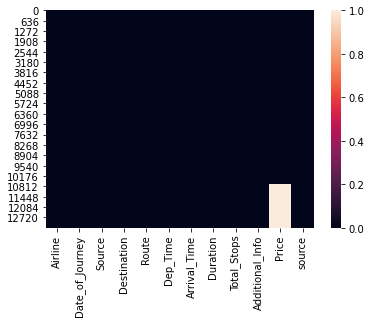

In [ ]:
#Checking Null_Values through Heat_Map
sns.heatmap(Flight.isnull())

**Observation :**

There are some missing values present in 3 columns which will be filled later . 

# **Feature Engineering of Data**

In [ ]:
#Lets split Date_of_Journey column values with independent years,months and date .

Flight['Date'] = Flight['Date_of_Journey'].str.split('/').str[0]
Flight['Month'] = Flight['Date_of_Journey'].str.split('/').str[0]
Flight['Year'] = Flight['Date_of_Journey'].str.split('/').str[0]

In [ ]:
#Checking Data
Flight.head()

Airline Date_of_Journey    Source Destination  ... source Date Month Year
0       IndiGo      24/03/2019  Banglore   New Delhi  ...  train   24    24   24
1    Air India       1/05/2019   Kolkata    Banglore  ...  train    1     1    1
2  Jet Airways       9/06/2019     Delhi      Cochin  ...  train    9     9    9
3       IndiGo      12/05/2019   Kolkata    Banglore  ...  train   12    12   12
4       IndiGo      01/03/2019  Banglore   New Delhi  ...  train   01    01   01

[5 rows x 15 columns]

In [ ]:
#Now there is no need of Date_of_Journey column in Dataset, Hence drop it 
Flight = Flight.drop(['Date_of_Journey'],axis=1)

In [ ]:
#Change types of new columns made
Flight['Date'] = Flight['Date'].astype(int)
Flight['Month'] = Flight['Month'].astype(int)
Flight['Year'] = Flight['Year'].astype(int)
Flight.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
source              object
Date                 int64
Month                int64
Year                 int64
dtype: object

In [ ]:
#Next we will remove some dates written in Arrival_Time column 
Flight['Arrival_Time'] = Flight['Arrival_Time'].str.split(' ').str[0]
Flight['Arrival_Time'].head()

0    01:10
1    13:15
2    04:25
3    23:30
4    21:35
Name: Arrival_Time, dtype: object

In [ ]:
#Checking Null values of Total_Stops
Flight['Total_Stops'].isnull().sum()

1

In [ ]:
#Since we have 1 Nan Value ,so we will replace it with 1-stop
Flight['Total_Stops'] = Flight['Total_Stops'].fillna('1 stop')

#Also replace all non-stop with 0-stop
Flight['Total_Stops'] = Flight['Total_Stops'].replace('non-stop','0 stop')

In [ ]:
Flight['Total_Stops'].head(10)

0     0 stop
1    2 stops
2    2 stops
3     1 stop
4     1 stop
5     0 stop
6     1 stop
7     1 stop
8     1 stop
9     1 stop
Name: Total_Stops, dtype: object

In [ ]:
#Now we will remove that 'stop' keyword to make more cleaner 
Flight['Total_Stops'] = Flight['Total_Stops'].str.split(' ').str[0]
Flight['Total_Stops'] = Flight['Total_Stops'].astype(int)
Flight['Total_Stops'].head(10)

0    0
1    2
2    2
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: Total_Stops, dtype: int64

In [ ]:
#Now fill all Null Values in Price Column
Flight['Price'].fillna((Flight['Price'].mean()),inplace=True)

In [ ]:
#Now we will make independent routes inplace of combined one i.e, like Route1,Route2 and like on .
Flight['Route1']=Flight['Route'].str.split('?').str[0]
Flight['Route2']=Flight['Route'].str.split('?').str[1]
Flight['Route3']=Flight['Route'].str.split('?').str[2]
Flight['Route4']=Flight['Route'].str.split('?').str[3]
Flight.head()

Airline    Source Destination  ... Route2 Route3 Route4
0       IndiGo  Banglore   New Delhi  ...    DEL    NaN    NaN
1    Air India   Kolkata    Banglore  ...   IXR    BBI     BLR
2  Jet Airways     Delhi      Cochin  ...   LKO    BOM     COK
3       IndiGo   Kolkata    Banglore  ...   NAG     BLR    NaN
4       IndiGo  Banglore   New Delhi  ...   NAG     DEL    NaN

[5 rows x 18 columns]

In [ ]:
#Still there are some Nan Values present , Hence Remove it 
Flight['Route1'].fillna("None",inplace=True)
Flight['Route2'].fillna("None",inplace=True)
Flight['Route3'].fillna("None",inplace=True)
Flight['Route4'].fillna("None",inplace=True)

Flight = Flight.drop(['Route'],axis=1)
Flight.head()

Airline    Source Destination Dep_Time  ... Route1 Route2  Route3 Route4
0       IndiGo  Banglore   New Delhi    22:20  ...   BLR     DEL    None   None
1    Air India   Kolkata    Banglore    05:50  ...   CCU    IXR     BBI     BLR
2  Jet Airways     Delhi      Cochin    09:25  ...   DEL    LKO     BOM     COK
3       IndiGo   Kolkata    Banglore    18:05  ...   CCU    NAG      BLR   None
4       IndiGo  Banglore   New Delhi    16:50  ...   BLR    NAG      DEL   None

[5 rows x 17 columns]

In [ ]:
def change_into_datetime(col):
    Flight[col]=pd.to_datetime(Flight[col])

for i in ['Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [ ]:
#From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_minute']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [ ]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(Flight,'Dep_Time')

#extracting minutes
extract_min(Flight,'Dep_Time')

#drop the column
drop_col(Flight,'Dep_Time')

In [ ]:
#extracting hour
extract_hour(Flight,'Arrival_Time')

#extracting min
extract_min(Flight,'Arrival_Time')


#drop the column
drop_col(Flight,'Arrival_Time')

In [ ]:
Flight.head()

Airline    Source  ... Arrival_Time_hour Arrival_Time_minute
0       IndiGo  Banglore  ...                 1                  10
1    Air India   Kolkata  ...                13                  15
2  Jet Airways     Delhi  ...                 4                  25
3       IndiGo   Kolkata  ...                23                  30
4       IndiGo  Banglore  ...                21                  35

[5 rows x 19 columns]

In [ ]:
#Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

duration=list(Flight['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [ ]:
Flight['Duration']=duration

In [ ]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

Flight['dur_hour']=Flight['Duration'].apply(hour)
Flight['dur_min']=Flight['Duration'].apply(minutes)

drop_col(Flight,'Duration') #Remove Duration Column

Flight.head()

Airline    Source Destination  ...  Arrival_Time_minute dur_hour  dur_min
0       IndiGo  Banglore   New Delhi  ...                   10        2       50
1    Air India   Kolkata    Banglore  ...                   15        7       25
2  Jet Airways     Delhi      Cochin  ...                   25       19        0
3       IndiGo   Kolkata    Banglore  ...                   30        5       25
4       IndiGo  Banglore   New Delhi  ...                   35        4       45

[5 rows x 20 columns]

In [ ]:
Flight['dur_hour'] = Flight['dur_hour'].astype(int)
Flight['dur_min'] = Flight['dur_min'].astype(int)

In [ ]:
Flight.dtypes

Airline                 object
Source                  object
Destination             object
Total_Stops              int64
Additional_Info         object
Price                  float64
source                  object
Date                     int64
Month                    int64
Year                     int64
Route1                  object
Route2                  object
Route3                  object
Route4                  object
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
dur_hour                 int64
dur_min                  int64
dtype: object

In [ ]:
#Checking for Null Values Again
Flight.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price                  0
source                 0
Date                   0
Month                  0
Year                   0
Route1                 0
Route2                 0
Route3                 0
Route4                 0
Dep_Time_hour          0
Dep_Time_minute        0
Arrival_Time_hour      0
Arrival_Time_minute    0
dur_hour               0
dur_min                0
dtype: int64

In [ ]:
#Finding the categorical value
column=[column for column in Flight.columns if Flight[column].dtype=='object']
column

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'source',
 'Route1',
 'Route2',
 'Route3',
 'Route4']

In [ ]:
#Finding the cntinuous value
continuous_col =[column for column in Flight.columns if Flight[column].dtype!='object']
continuous_col

['Total_Stops',
 'Price',
 'Date',
 'Month',
 'Year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'dur_hour',
 'dur_min']

# **EDA(Exploratory_Data_Analysis)**

**1. Univariant_Analysis**

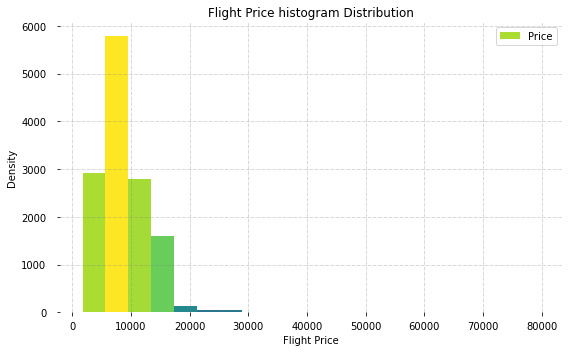

In [ ]:
#Histogram for Price Column

# Creating distribution
legend = ['Price']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(8, 5), 
                        tight_layout = True)
 
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    axs.spines[s].set_visible(False) 

# Add padding between axes and labels 
axs.xaxis.set_tick_params(pad = 5) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 

# Creating histogram
N, bins, patches = axs.hist(Flight['Price'], bins = 20)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# Adding extra features    
plt.xlabel("Flight Price")
plt.ylabel("Density")
plt.legend(legend)
plt.title('Flight Price histogram Distribution')
  
# Show plot
plt.show()
  

**Above plot shows Flight Price lies between range of 0 - 30000**

In [ ]:
Flight['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

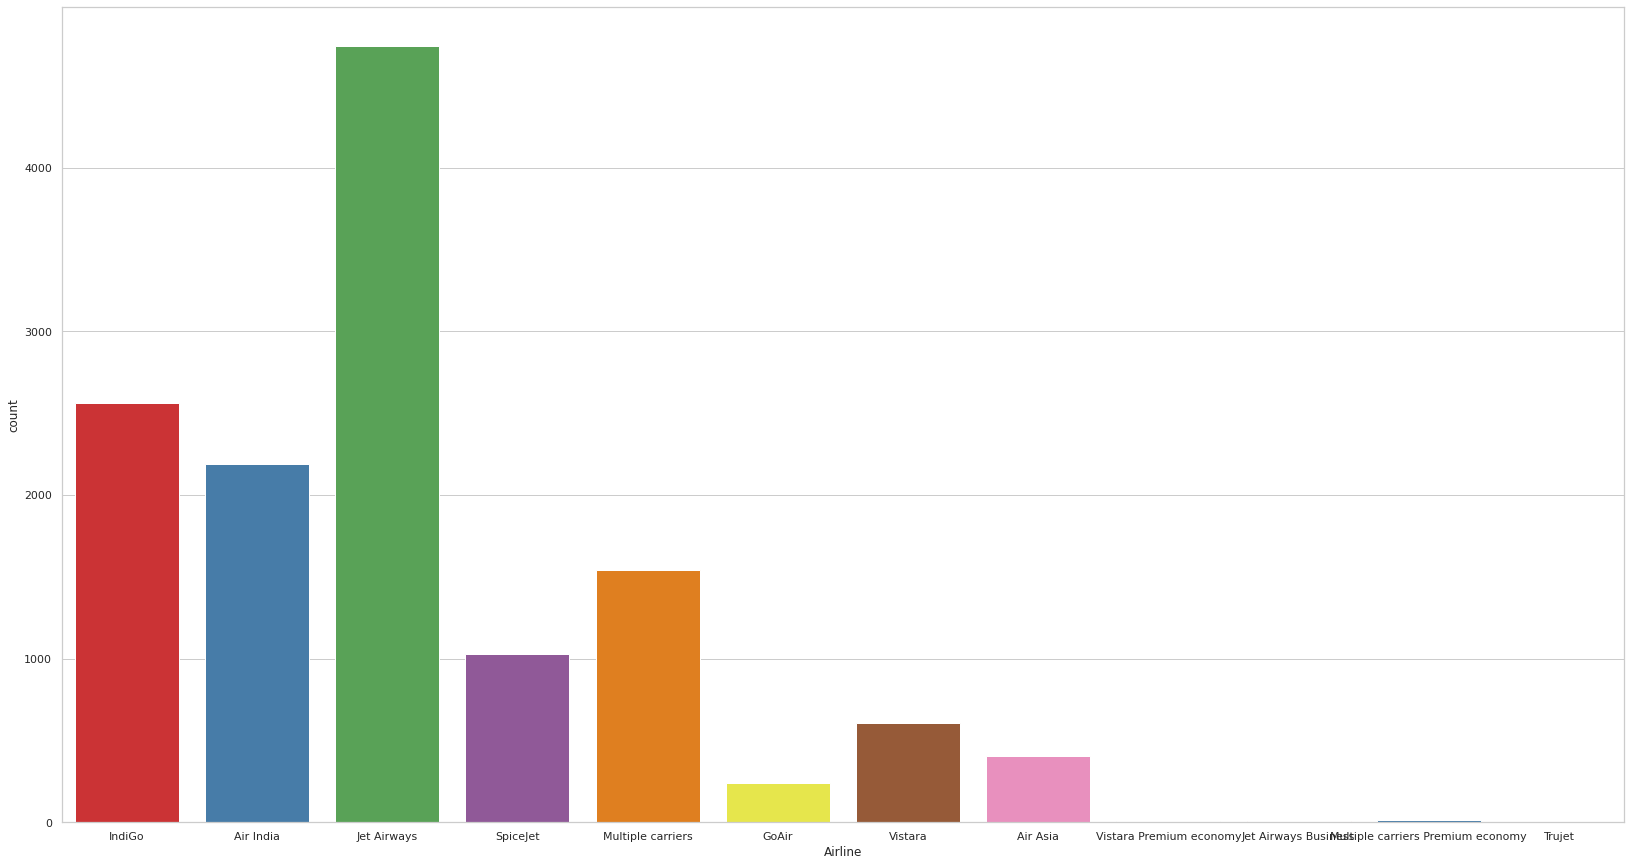

In [ ]:
# Plotting Airline Distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(28,15))
sns.countplot(x='Airline',data=Flight,saturation=.75,palette='Set1')
plt.show()

**Most of the persons choose Jet_Airways as Airlines .**

In [ ]:
Flight['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

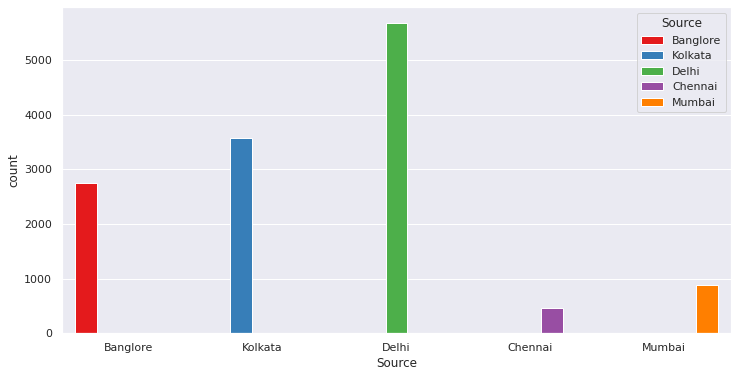

In [ ]:
# Plotting Source Distribution
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x='Source',data=Flight,hue='Source',saturation=1.0,palette='Set1')
plt.show()

**Most Persons have Delhi as their source of place .**

In [ ]:
Flight['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

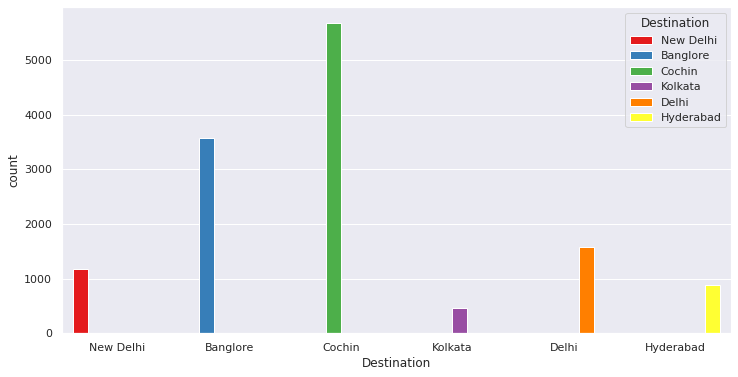

In [ ]:
# Plotting Destination Distribution
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x='Destination',data=Flight,hue='Destination',saturation=1.0,palette='Set1')
plt.show()

**Most of the Persons have Cochin as Destination .**

In [ ]:
Flight['Total_Stops'].value_counts()

1    7057
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

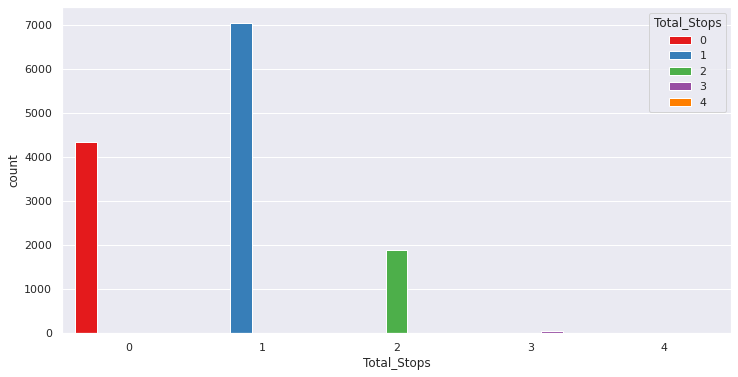

In [ ]:
# Plotting Total_Stops Distribution
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x='Total_Stops',data=Flight,hue='Total_Stops',saturation=1.0,palette='Set1')
plt.show()

**Maximum Airlines have 1 stoppage in entire journey .**

In [ ]:
Flight['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
1 Short layover                     1
2 Long layover                      1
Name: Additional_Info, dtype: int64

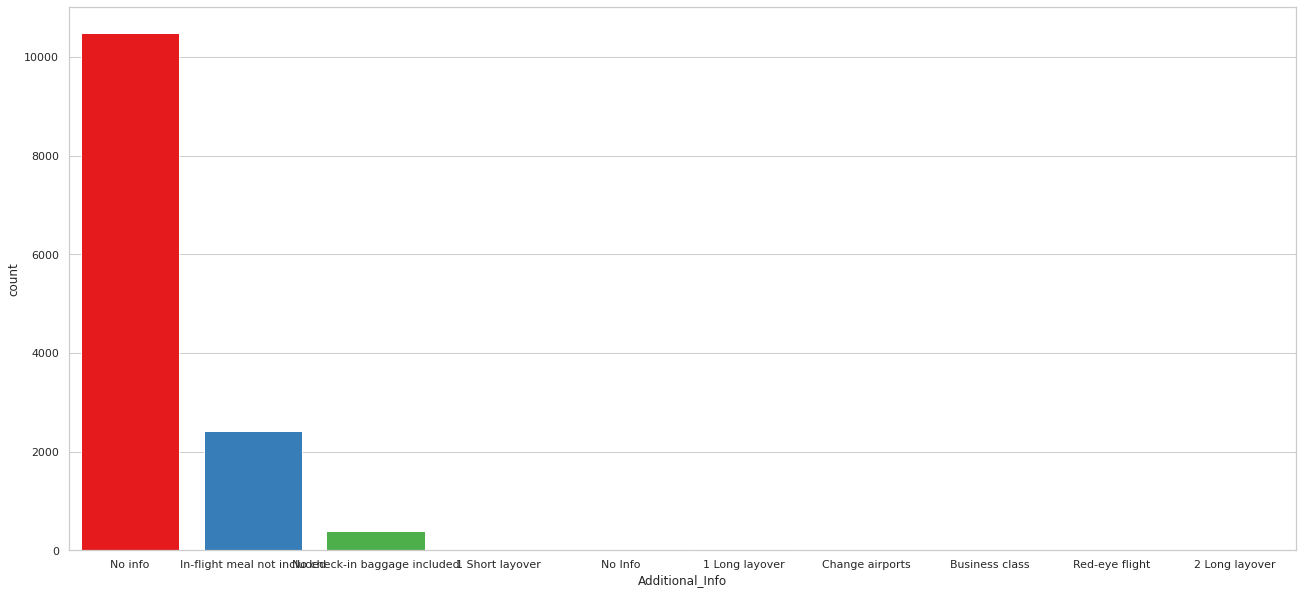

In [ ]:
# Plotting Additional_Info Distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(22,10))
sns.countplot(x='Additional_Info',data=Flight,saturation=1.0,palette='Set1')
plt.show()

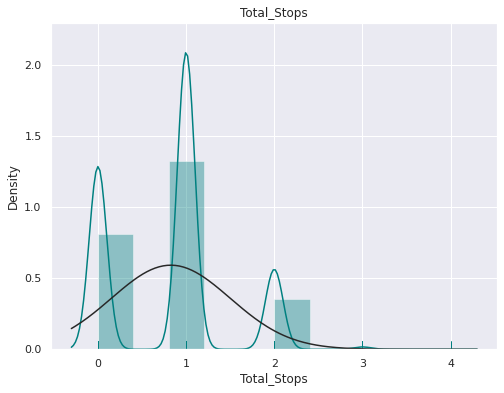

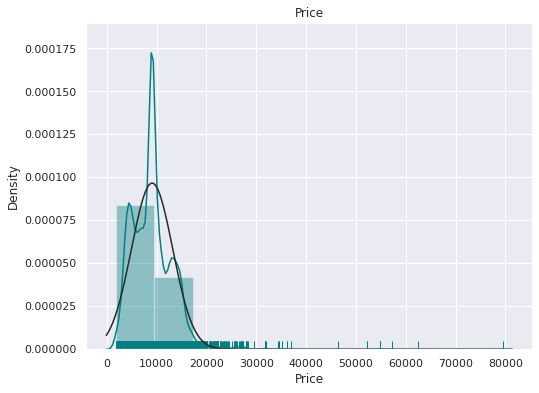

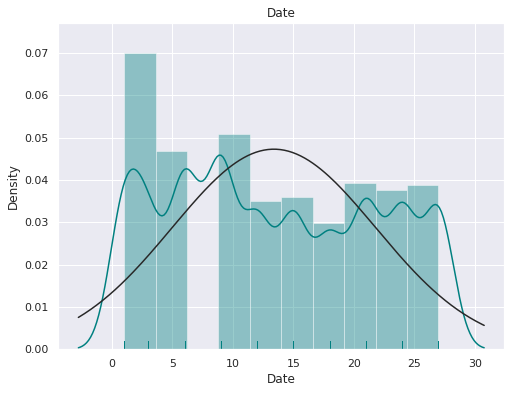

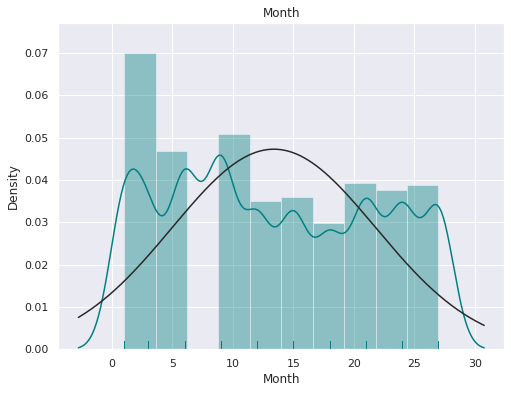

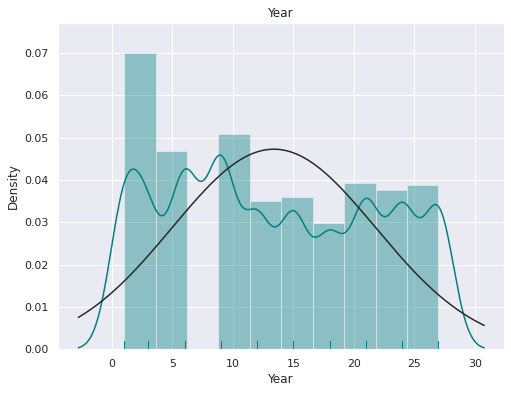

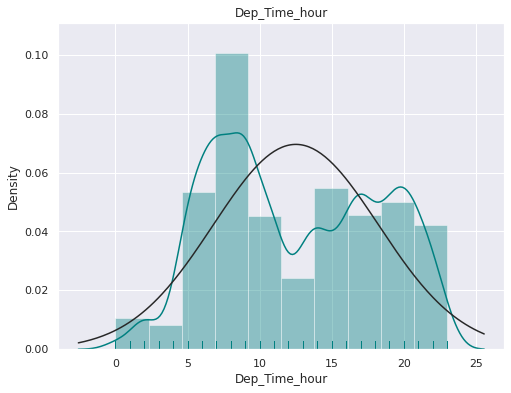

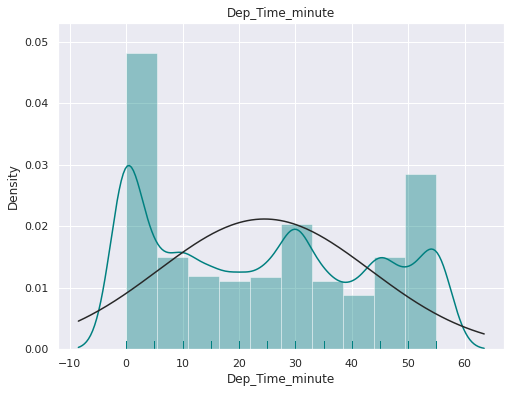

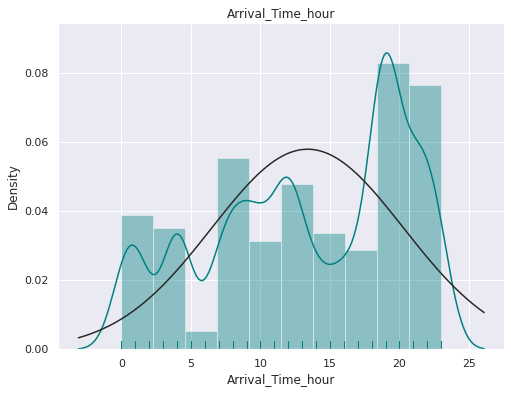

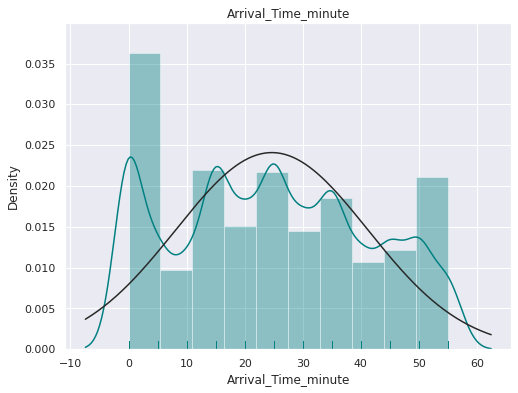

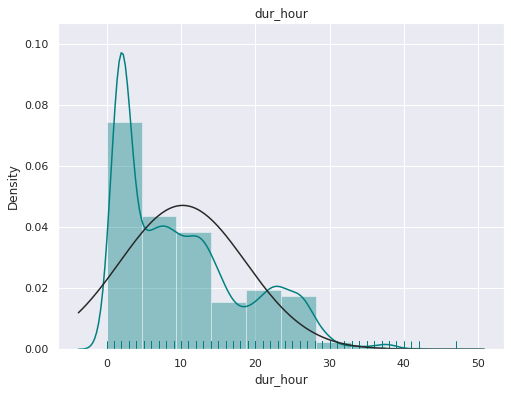

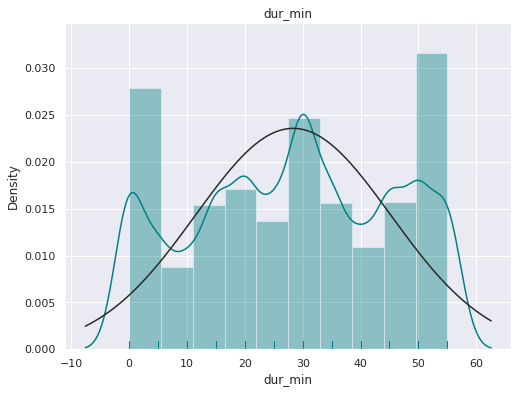

In [ ]:
#Plotting Distplot for continous values

from scipy.stats import norm
sns.set_theme(style="darkgrid")
for i in continuous_col:
  plt.figure(figsize = (8,6))
  sns.distplot(Flight[i], bins = 10, rug=True,color='teal',fit=norm)
  plt.title(i)
  plt.show()

**Observation :**

1. Price, Dur_min are left-Skewed .
2. All others attributes are equally distributed .


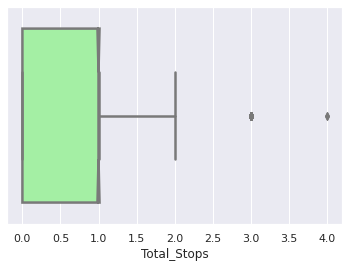

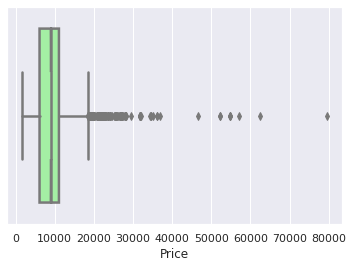

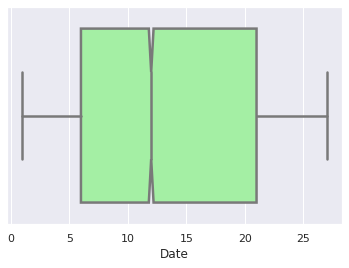

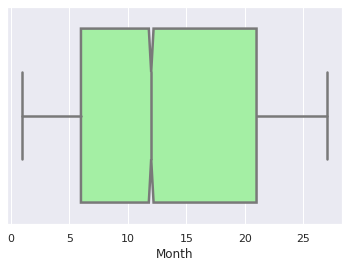

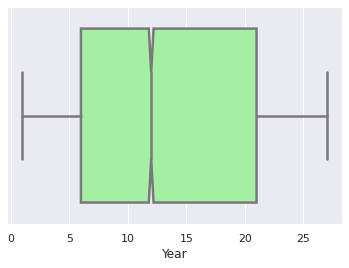

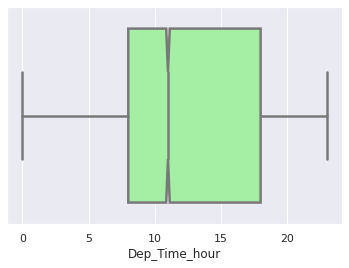

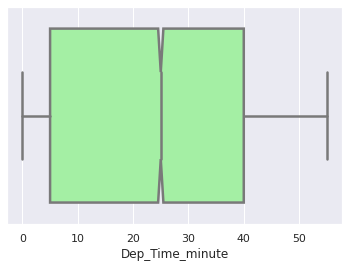

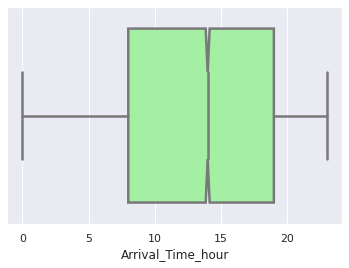

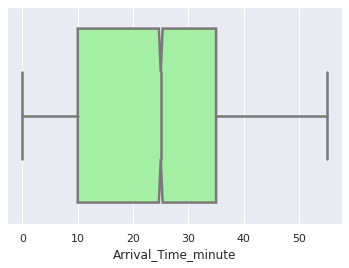

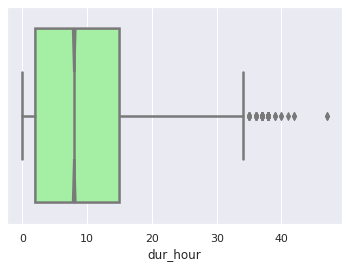

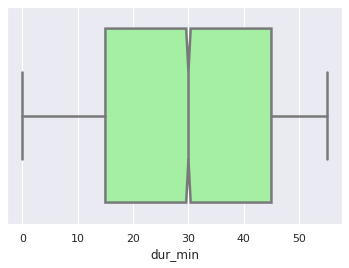

In [ ]:
#Plotting Boxplot for every attributes
for i in continuous_col:
  sns.boxplot(Flight[i], notch=True,color='palegreen',linewidth=2.5)
  plt.show()

**Observation :**

Columns namely Du_hour , Price , Total_Stops have some outliers .

**2. Multivariant Analysis**

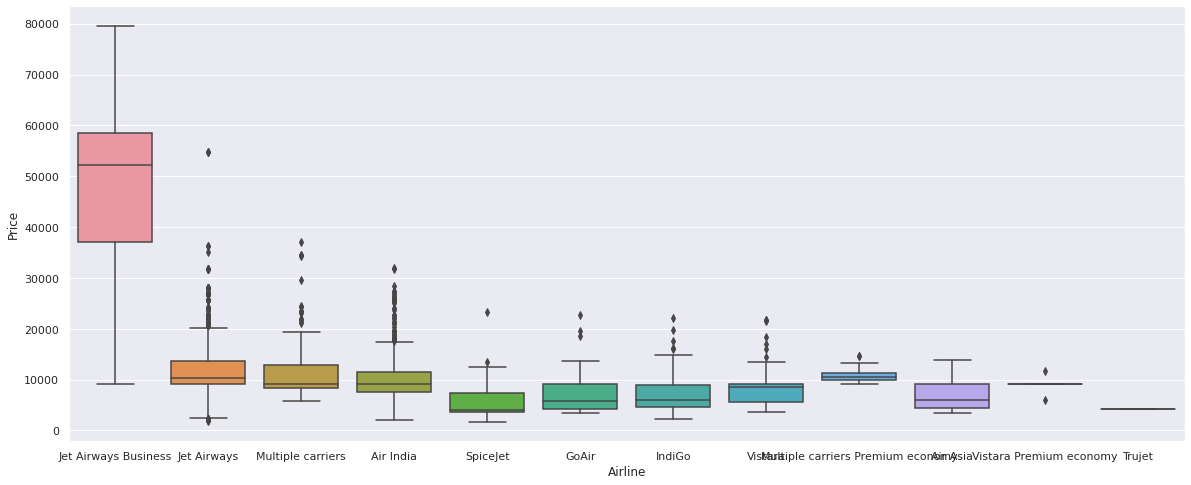

In [ ]:
#Airline vs Price Analysis

plt.figure(figsize=(20,8))
sns.boxplot(x='Airline',y='Price',data=Flight.sort_values('Price',ascending=False))

**Observation :**

From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

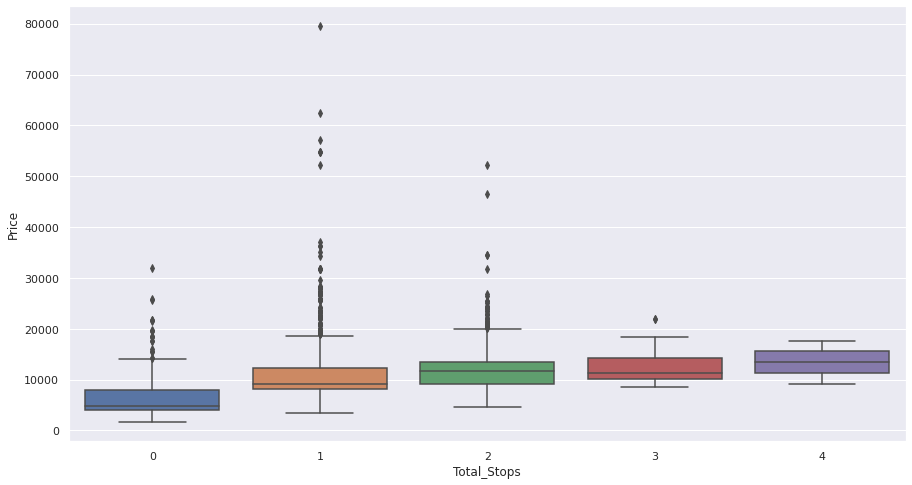

In [ ]:
#Perform Total_Stops vs Price Analysis

plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=Flight.sort_values('Price',ascending=False))

In [ ]:
Flight['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

<Figure size 1080x1080 with 0 Axes>

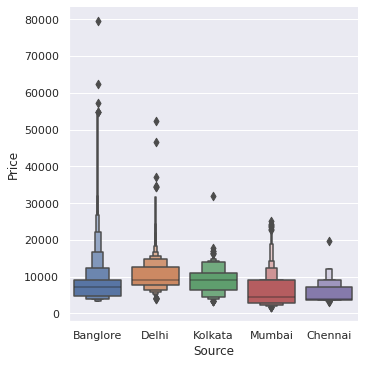

In [ ]:
#Source vs Price
plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=Flight.sort_values('Price',ascending=False),kind='boxen')

In [ ]:
Flight['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

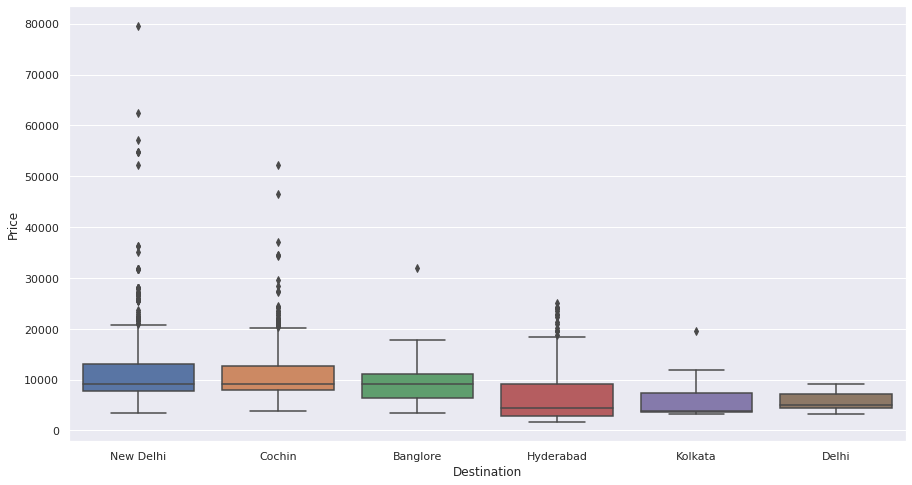

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=Flight.sort_values('Price',ascending=False))

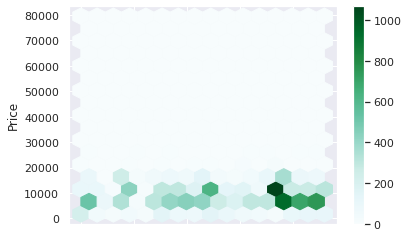

In [ ]:
#Arrival_Time_hour vs Price
Flight.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

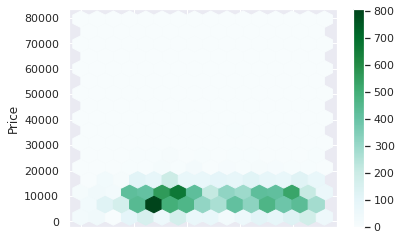

In [ ]:
Flight.plot.hexbin(x='Dep_Time_hour',y='Price',gridsize=15)

**Performing Label_Encoder**

In [ ]:
Flight.dtypes

Airline                 object
Source                  object
Destination             object
Total_Stops              int64
Additional_Info         object
Price                  float64
source                  object
Date                     int64
Month                    int64
Year                     int64
Route1                  object
Route2                  object
Route3                  object
Route4                  object
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
dur_hour                 int64
dur_min                  int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Flight["Airline"]=encoder.fit_transform(Flight['Airline'])
Flight["Source"]=encoder.fit_transform(Flight['Source'])
Flight["Destination"]=encoder.fit_transform(Flight['Destination'])
Flight["Additional_Info"]=encoder.fit_transform(Flight['Additional_Info'])
Flight["Route1"]=encoder.fit_transform(Flight['Route1'])
Flight["Route2"]=encoder.fit_transform(Flight['Route2'])
Flight["Route3"]=encoder.fit_transform(Flight['Route3'])
Flight["Route4"]=encoder.fit_transform(Flight['Route4'])

In [ ]:
Flight.head()

Airline  Source  Destination  ...  Arrival_Time_minute  dur_hour  dur_min
0        3       0            5  ...                   10         2       50
1        1       3            0  ...                   15         7       25
2        4       2            1  ...                   25        19        0
3        3       3            0  ...                   30         5       25
4        3       0            5  ...                   35         4       45

[5 rows x 20 columns]

**Plotting Pairplot**

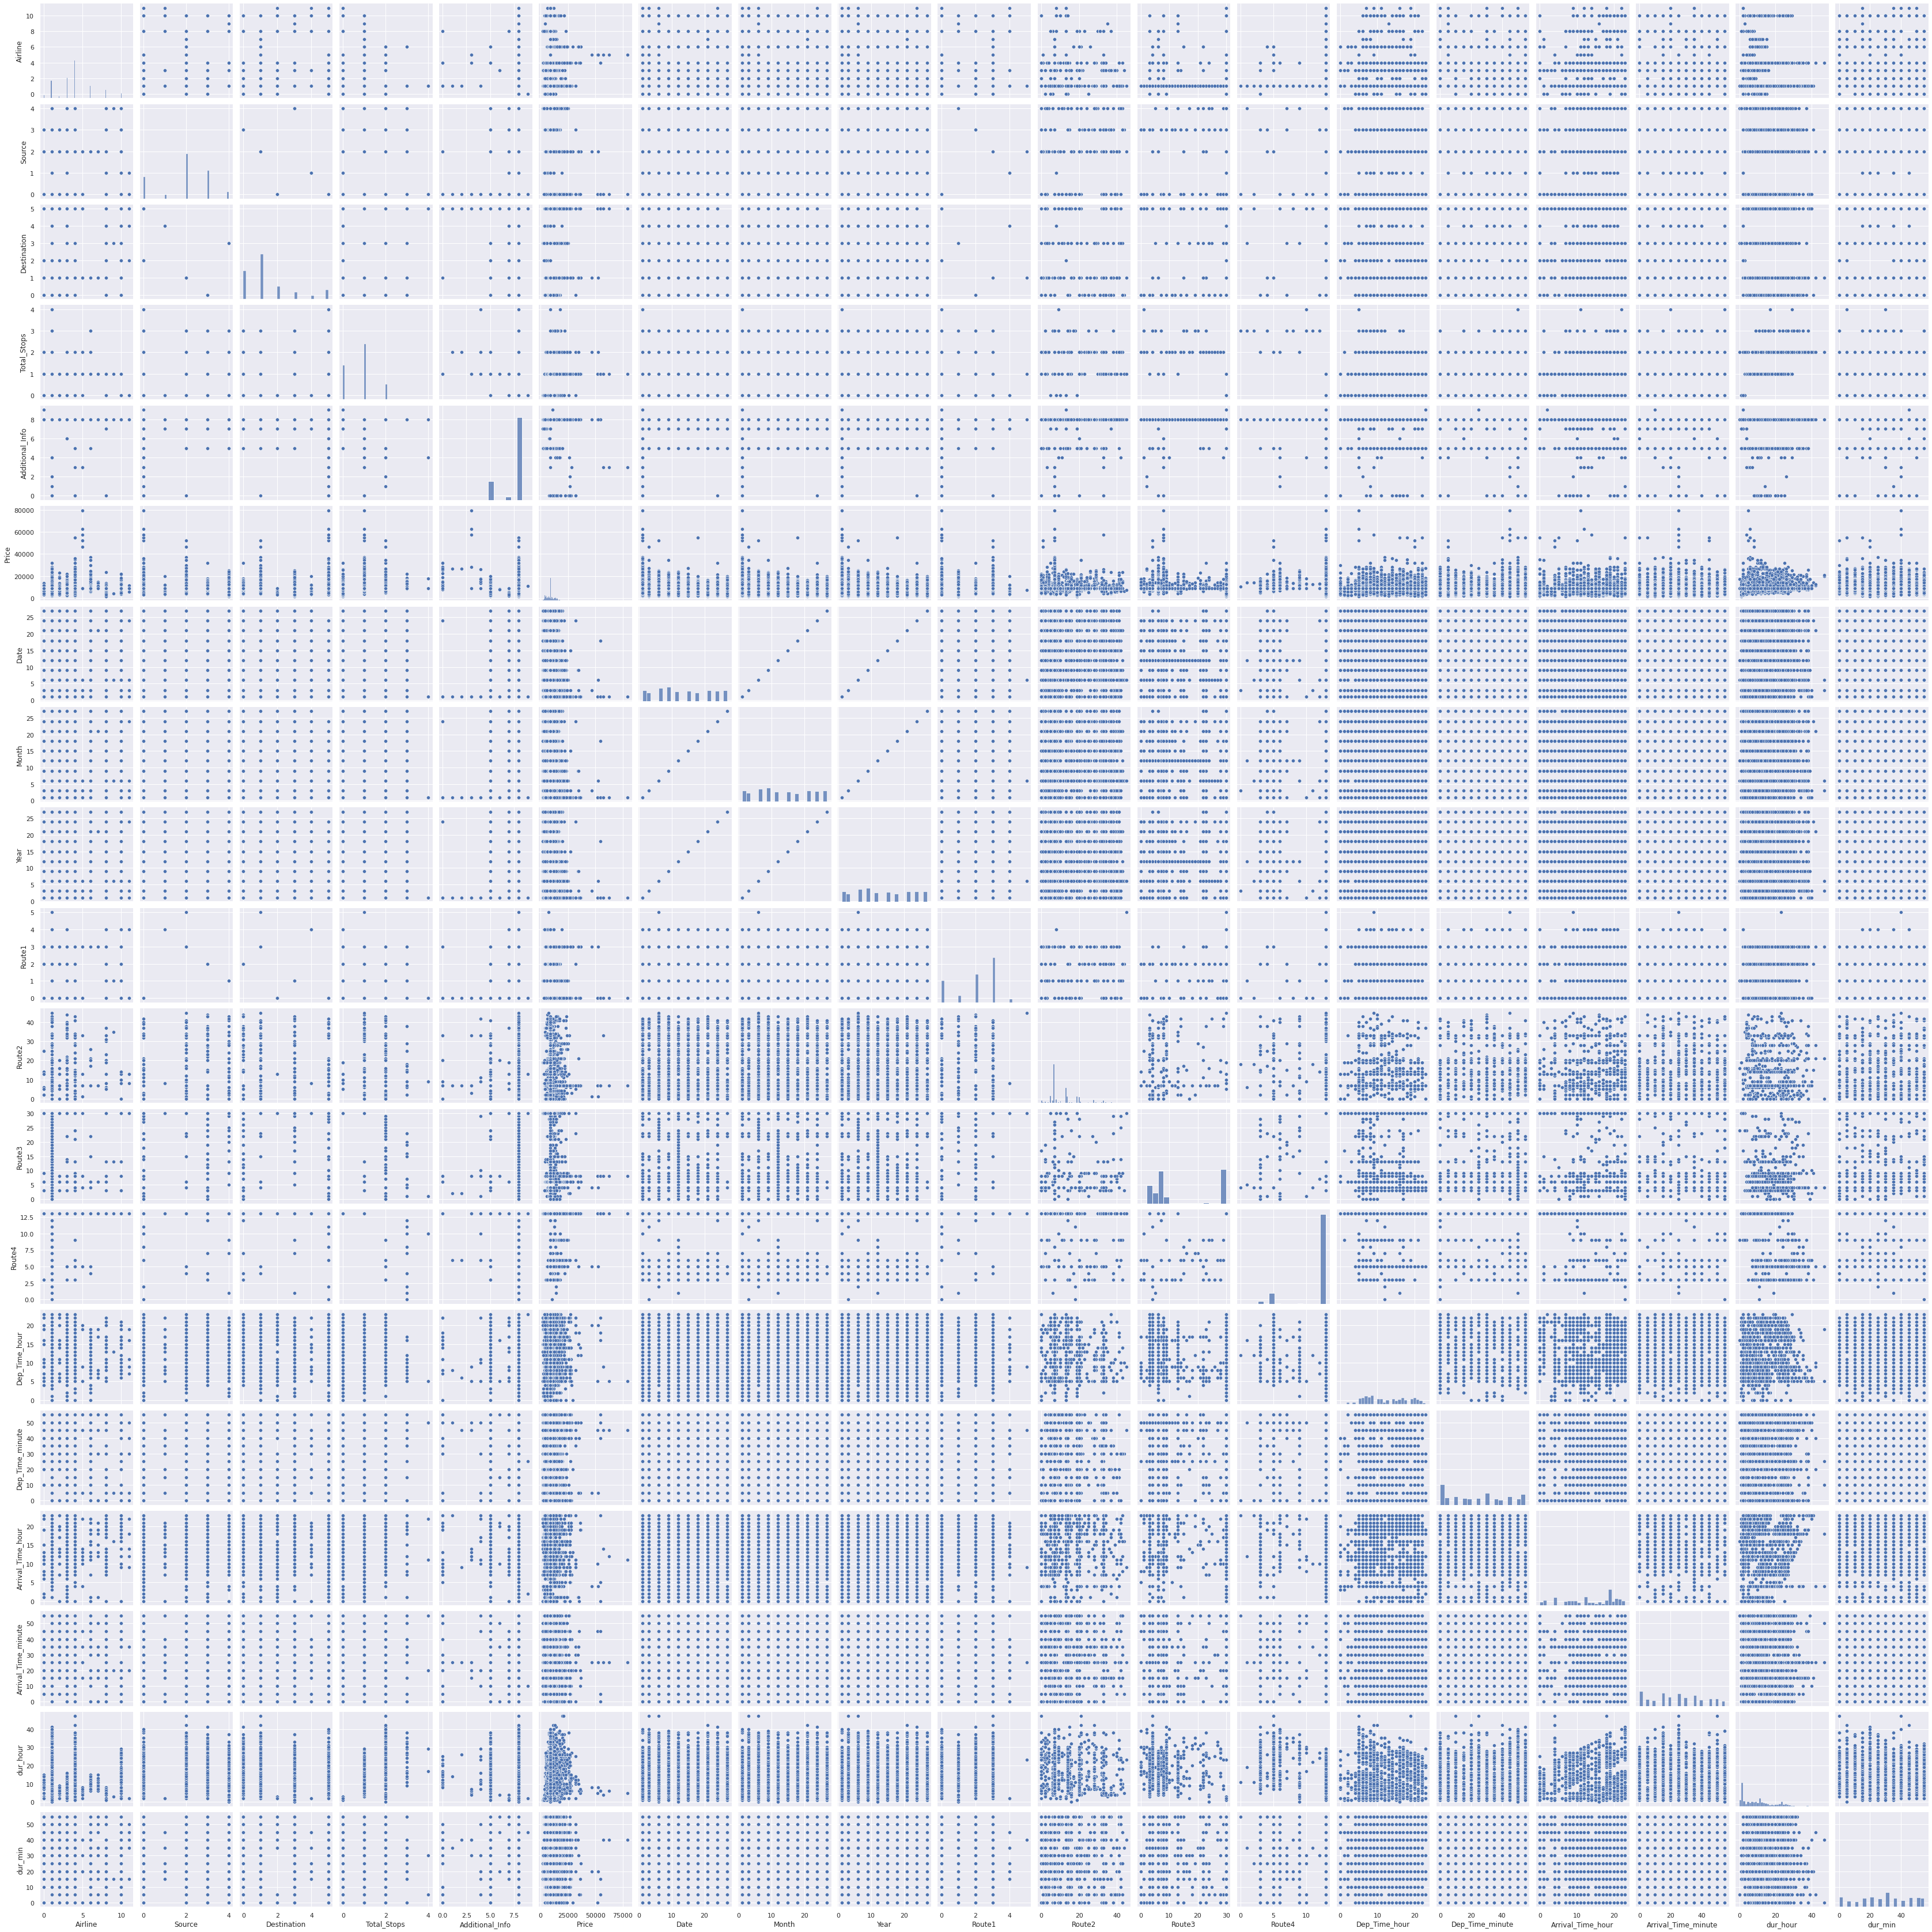

In [ ]:
sns.pairplot(Flight)

**Checking Correlation between all variables**

In [ ]:
cor = Flight.corr()
cor

Airline    Source  ...  dur_hour   dur_min
Airline              1.000000 -0.018547  ... -0.161509 -0.030362
Source              -0.018547  1.000000  ...  0.163599 -0.144411
Destination          0.022130 -0.589710  ... -0.256161  0.063209
Total_Stops         -0.206350  0.191144  ...  0.738768 -0.132595
Additional_Info     -0.058533 -0.022219  ... -0.166303  0.046981
Price               -0.035170  0.014292  ...  0.456096 -0.111953
Date                 0.020666 -0.002568  ... -0.022738 -0.003736
Month                0.020666 -0.002568  ... -0.022738 -0.003736
Year                 0.020666 -0.002568  ... -0.022738 -0.003736
Route1               0.030980  0.439608  ...  0.298652 -0.243650
Route2              -0.065699  0.038506  ...  0.032157  0.037862
Route3               0.064746 -0.267371  ... -0.657208  0.165714
Route4               0.269561 -0.076944  ... -0.480806  0.010732
Dep_Time_hour       -0.026127  0.058471  ... -0.001659 -0.023553
Dep_Time_minute     -0.057826 -0.058563  ... -0.013372  0.092277
Arrival_Time_hour   -0.007831  0.020766  ...  0.054545 -0.119507
Arrival_Time_minute -0.074001  0.015057  ... -0.075437  0.156397
dur_hour            -0.161509  0.163599  ...  1.000000 -0.119507
dur_min             -0.030362 -0.144411  ... -0.119507  1.000000

[19 rows x 19 columns]

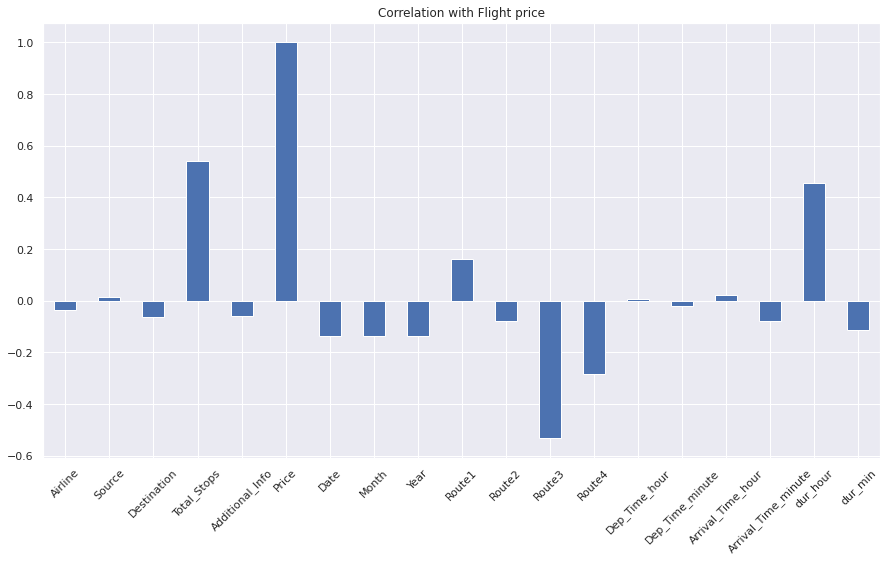

In [ ]:
#Correlation of Price with other attributes

Flight.corrwith(Flight.Price).plot.bar(figsize=(15,8),title = 'Correlation with Flight price',rot=45,grid=True)

**Observation :**

1. Columns namely Airline,Destination,Addititional_Info,Date,Month,Year,Route2,Route3,Route4,dur_min have -ve correlation between Target Price column .
2. Attributes namely Total_Stops , Route , Dur_hour have +ve correlation between target column .

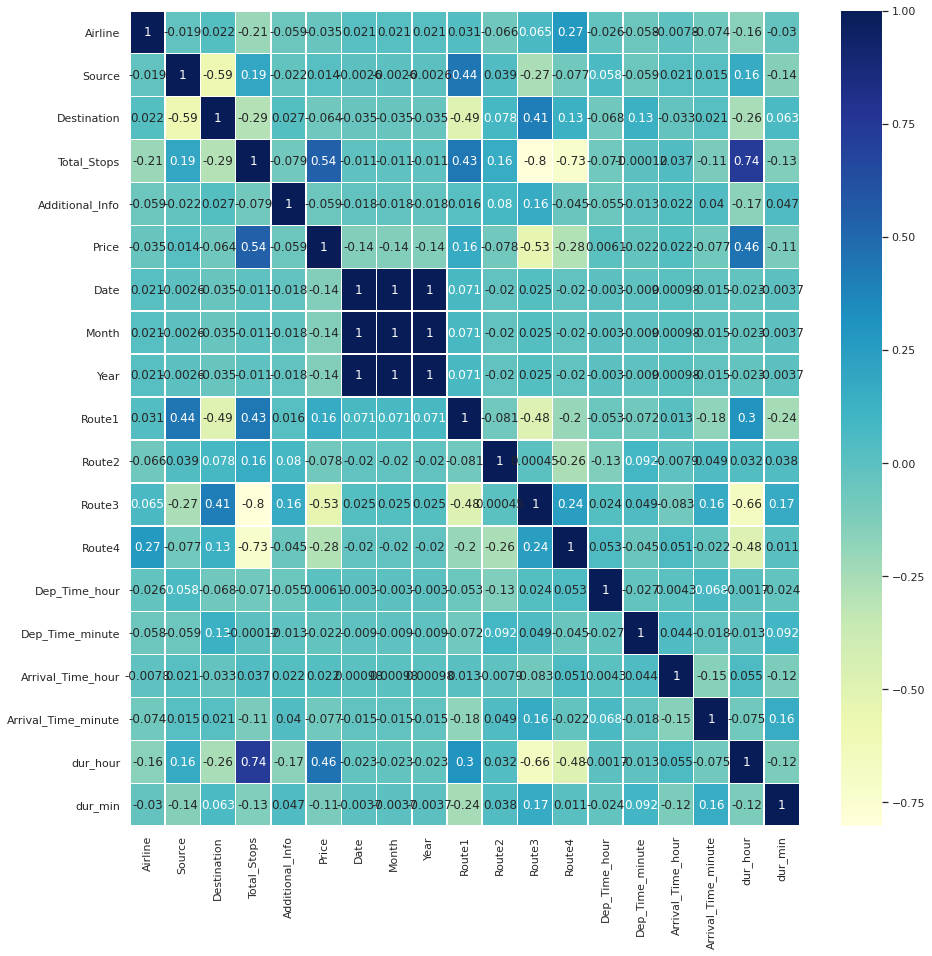

In [ ]:
# Plotting Heatmap to show Correlation between Variables

plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,linewidths=.5,cmap="YlGnBu")
plt.show()

In [ ]:
#Display Coorelation values of all attributes
cor['Price'].sort_values(ascending=False)

Price                  1.000000
Total_Stops            0.540592
dur_hour               0.456096
Route1                 0.162966
Arrival_Time_hour      0.021585
Source                 0.014292
Dep_Time_hour          0.006112
Dep_Time_minute       -0.021831
Airline               -0.035170
Additional_Info       -0.059337
Destination           -0.063664
Arrival_Time_minute   -0.076809
Route2                -0.078325
dur_min               -0.111953
Year                  -0.138160
Month                 -0.138160
Date                  -0.138160
Route4                -0.283142
Route3                -0.530814
Name: Price, dtype: float64

**Plotting Null Values**

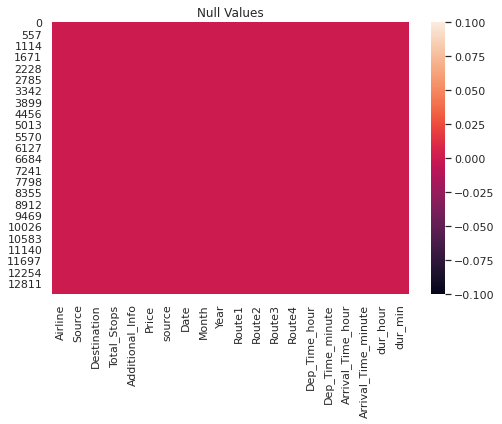

In [ ]:
#Plotting Null Values

plt.figure(figsize=[8,5])
sns.heatmap(Flight.isnull())
plt.title("Null Values")
plt.show()

**No NUll values are present in the above Heat_Map .**

**Cheking for Outliers**

In [ ]:
Flight.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'source', 'Date', 'Month', 'Year', 'Route1', 'Route2',
       'Route3', 'Route4', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'dur_hour', 'dur_min'],
      dtype='object')

Airline                    AxesSubplot(0.125,0.71587;0.133621x0.16413)
Source                  AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Destination              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Total_Stops             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Additional_Info         AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Price                     AxesSubplot(0.125,0.518913;0.133621x0.16413)
Date                   AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Month                   AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Year                   AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Route1                 AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Route2                    AxesSubplot(0.125,0.321957;0.133621x0.16413)
Route3                 AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Route4                  AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Dep_Time_hour          AxesSubplot(0.606034,0.321957;0.133621x0.16413)
Dep_Ti

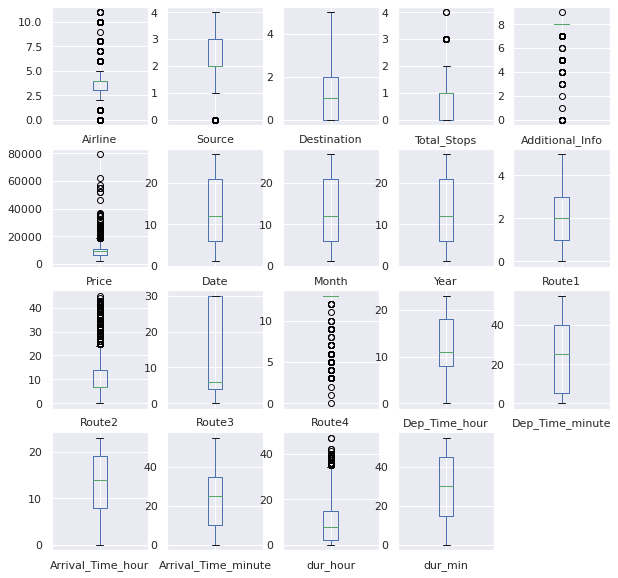

In [ ]:
#Plotting Outliers
Flight.plot(kind='box',subplots= True,layout=(4,5),figsize=(10,10))

**Handling outliers:**
As there is some outliers in price feature,so we replace it with median.

In [ ]:
Flight['Price']=np.where(Flight['Price']>=40000,Flight['Price'].median(),Flight['Price'])

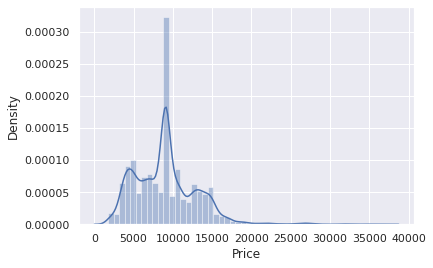

In [ ]:
sns.distplot(Flight['Price'])

**Checking for skewness**

In [ ]:
Flight.skew()

Airline                0.720924
Source                -0.424151
Destination            1.247893
Total_Stops            0.317797
Additional_Info       -1.784752
Price                  0.998431
Date                   0.135142
Month                  0.135142
Year                   0.135142
Route1                -0.618133
Route2                 1.426787
Route3                 0.636124
Route4                -2.084009
Dep_Time_hour          0.109087
Dep_Time_minute        0.159397
Arrival_Time_hour     -0.384591
Arrival_Time_minute    0.111711
dur_hour               0.857425
dur_min               -0.093531
dtype: float64

In [ ]:
#Using PowerTransformer to remove skewness

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson') ##using yeo-johnson method due to presence of negative skewness
for i in Temp.skew().index[1:]:
    if Temp.skew().loc[i]>0.55:
        Temp[i]=pt.fit_transform(Temp[i].values.reshape(-1,1))
    if Temp.skew().loc[i]<-0.55:
        Temp[i]=pt.fit_transform(Temp[i].values.reshape(-1,1))
    else:
        Temp[i]=Temp[i]

**Splitting Data and Target Variable**

In [ ]:
Flight_train = Flight.loc[Flight['source'] == 'train'] #For Modelling of Data
Flight_test = Flight.loc[Flight['source'] == 'test'] #For Testing of Data

In [ ]:
#Checking shape of both train and test data

Flight_train.shape , Flight_test.shape

((10683, 20), (2671, 20))

In [ ]:
Flight_train.drop('source', axis=1, inplace = True)
Flight_test.drop(['source','Price'],axis=1,inplace=True)

In [ ]:
#Splitting of train data

X = Flight_train.drop('Price',axis=1)
y = Flight_train['Price']

In [ ]:
X.head()

Airline  Source  Destination  ...  Arrival_Time_minute  dur_hour  dur_min
0        3       0            5  ...                   10         2       50
1        1       3            0  ...                   15         7       25
2        4       2            1  ...                   25        19        0
3        3       3            0  ...                   30         5       25
4        3       0            5  ...                   35         4       45

[5 rows x 18 columns]

In [ ]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

**Scaling**

In [ ]:
#Scale the Data using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [ ]:
X.head()

Airline    Source  Destination  ...  Arrival_Time_minute  dur_hour   dur_min
0 -0.410675 -1.658441     2.416665  ...            -0.890057 -0.970698  1.279008
1 -1.260999  0.890052    -0.973826  ...            -0.587124 -0.382117 -0.196388
2  0.014486  0.040555    -0.295728  ...             0.018744  1.030476 -1.671784
3 -0.410675  0.890052    -0.973826  ...             0.321677 -0.617549 -0.196388
4 -0.410675 -1.658441     2.416665  ...             0.624611 -0.735265  0.983929

[5 rows x 18 columns]

# **Finding Best Random State**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    pred_lr = LR.predict(X_test)
    score = r2_score(y_test, pred_lr)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.5562249958617341  on Random_state  576


**Creating train test split**

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = maxRS)

# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

# **Modeling**

In [ ]:
#Importing all libraries and packages
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.metrics import mean_absolute_error              #for checking model accuracy
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.svm import SVR          
from sklearn.model_selection import cross_val_score          #for cross validating model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2_Score is : 0.5562249958617341
Mean_Squared_Error is : 8415262.496842321
Mean_Absolute_Error is : 2186.8881919703836
Root_Mean_Squared_Error is: 2900.9071851478325


[0.53679968 0.51855191 0.55808114 0.54118798 0.52807882 0.50568234
 0.49386087 0.50911216]
cross validation score:   0.5239193633242051
Difference between R2 score and cross validatio score is : 0.03230563253752905




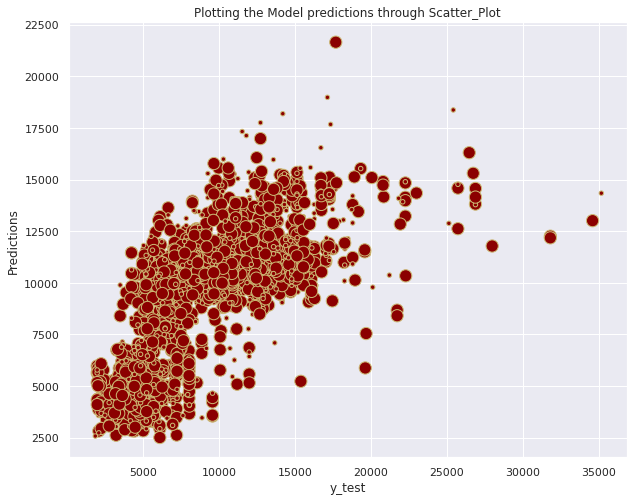

-----------------------------X----------------------------



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


r2_Score is : 0.7744706157400084
Mean_Squared_Error is : 4276691.908289021
Mean_Absolute_Error is : 1149.3721648753622
Root_Mean_Squared_Error is: 2068.0164187667906


[0.75051804 0.76425069 0.79407344 0.76712022 0.76524326 0.75005864
 0.76298572 0.69808039]
cross validation score:   0.7565413002428473
Difference between R2 score and cross validatio score is : 0.017929315497161147




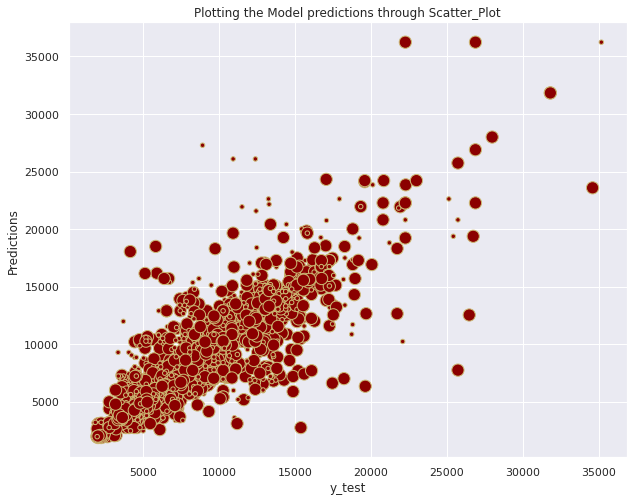

-----------------------------X----------------------------



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


r2_Score is : 0.8539562180427268
Mean_Squared_Error is : 2769414.1169319726
Mean_Absolute_Error is : 1011.344600916688
Root_Mean_Squared_Error is: 1664.1556768920307


[0.82313645 0.84080793 0.84791614 0.84742225 0.83022738 0.8235932
 0.85449193 0.80111625]
cross validation score:   0.8335889420990956
Difference between R2 score and cross validatio score is : 0.02036727594363119




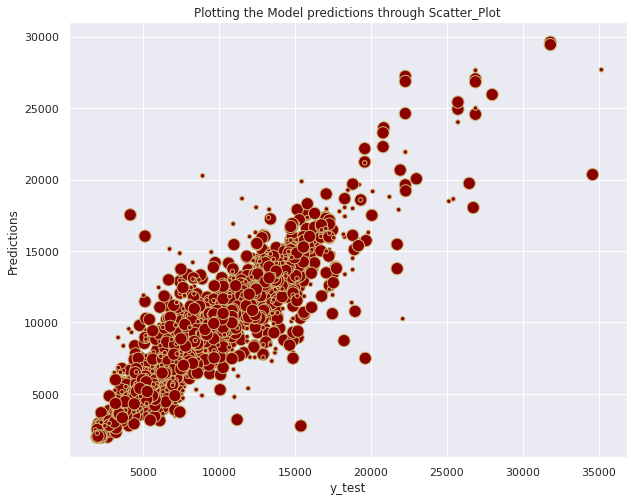

-----------------------------X----------------------------



GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


r2_Score is : 0.8107401747467994
Mean_Squared_Error is : 3588915.7675856072
Mean_Absolute_Error is : 1320.8546961473846
Root_Mean_Squared_Error is: 1894.4433925524424


[0.77023073 0.77673606 0.80659436 0.80228961 0.79059419 0.77377663
 0.78084276 0.76950453]
cross vali

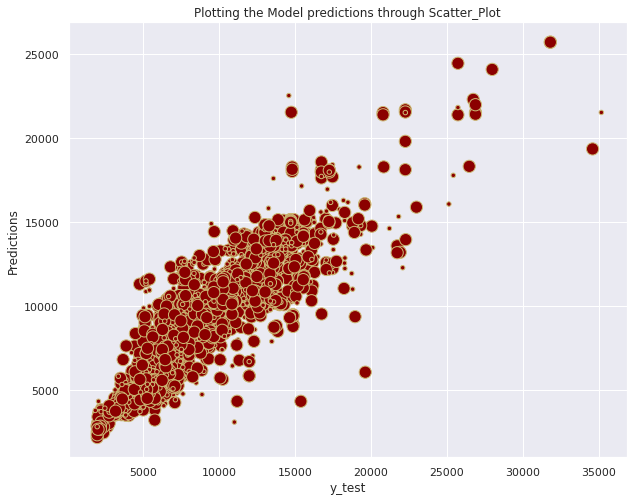

-----------------------------X----------------------------



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


r2_Score is : 0.7692115998445886
Mean_Squared_Error is : 4376418.118243005
Mean_Absolute_Error is : 1298.2350037990286
Root_Mean_Squared_Error is: 2091.989033968153


[0.76626479 0.78167114 0.76678476 0.77903034 0.76622142 0.76736929
 0.78162409 0.73330942]
cross validation score:   0.7677844077425707
Difference between R2 score and cross validatio score is : 0.0014271921020179157




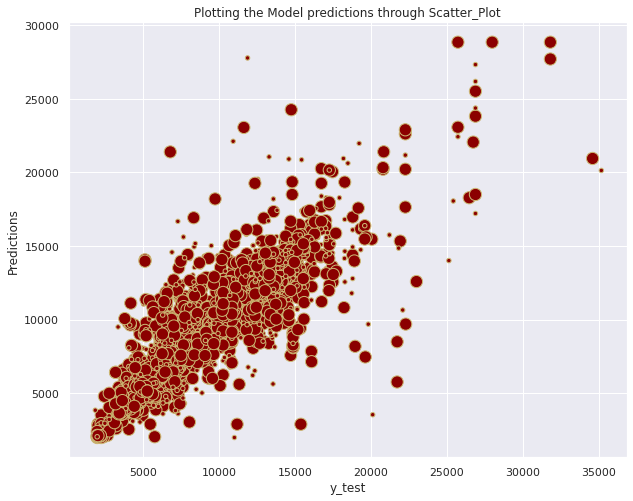

-----------------------------X----------------------------



Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


r2_Score is : 0.5562186795734723
Mean_Squared_Error is : 8415382.272005934
Mean_Absolute_Error is : 2186.8936532271796
Root_Mean_Squared_Error is: 2900.9278295066106


[0.53679709 0.51856958 0.55807883 0.5411917  0.52807197 0.50532493
 0.49387019 0.50912233]
cross validation score:   0.5238783271006757
Difference between R2 score and cross validatio score is : 0.03234035247279654




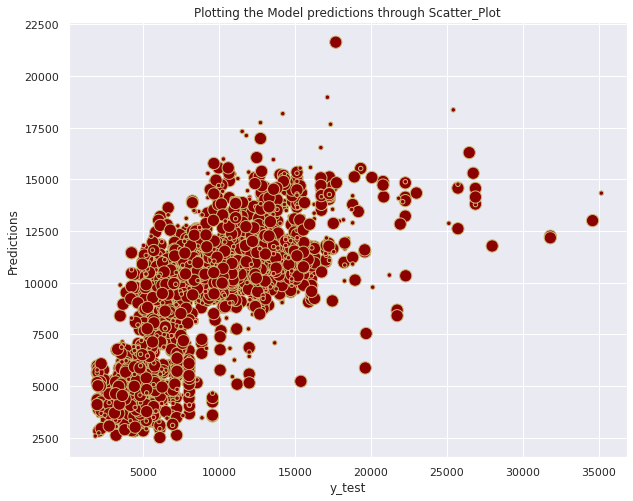

-----------------------------X----------------------------



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


r2_Score is : 0.04015359651032113
Mean_Squared_Error is : 18201474.546094608
Mean_Absolute_Error is : 3418.6942140409606
Root_Mean_Squared_Error is: 4266.31861750791


[0.06337163 0.02834112 0.05575581 0.06625493 0.0529193  0.0684226
 0.0578901  0.05703348]
cross validation score:   0.05624862256719099
Difference between R2 score and cross validatio score is : -0.016095026056869854




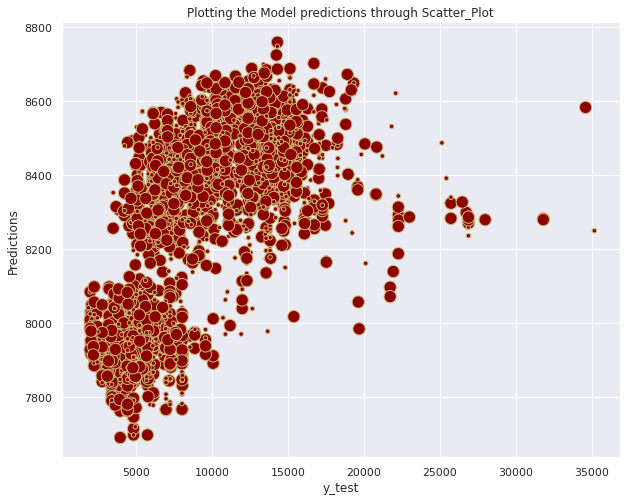

-----------------------------X----------------------------



AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)


r2_Score is : 0.5578943579392928
Mean_Squared_Error is : 8383606.545168772
Mean_Absolute_Error is : 2339.4426923807814
Root_Mean_Squared_Error is: 2895.4458283947865


[0.60119233 0.55014674 0.52345801 0.55367683 0.58253095 0.48537703
 0.54802943 0.55152163]
cross validation score:   0.549491619360427
Difference between R2 score and cross validatio score is : 0.008402738578865754




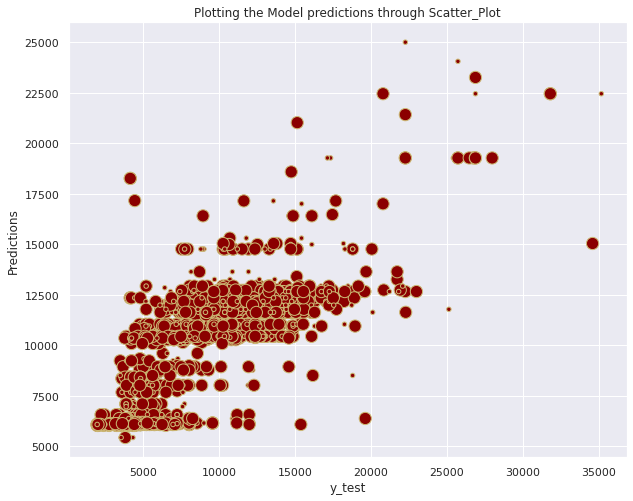

-----------------------------X----------------------------



Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


r2_Score is : 0.556234552517388
Mean_Squared_Error is : 8415081.274905147
Mean_Absolute_Error is : 2186.801623983188
Root_Mean_Squared_Error is: 2900.875949589218


[0.53676938 0.51856854 0.55817798 0.54119169 0.52800018 0.50532576
 0.4938845  0.50923857]
cross validation score:   0.5238945750442872
Difference between R2 score and cross validatio score is : 0.0323399774731008




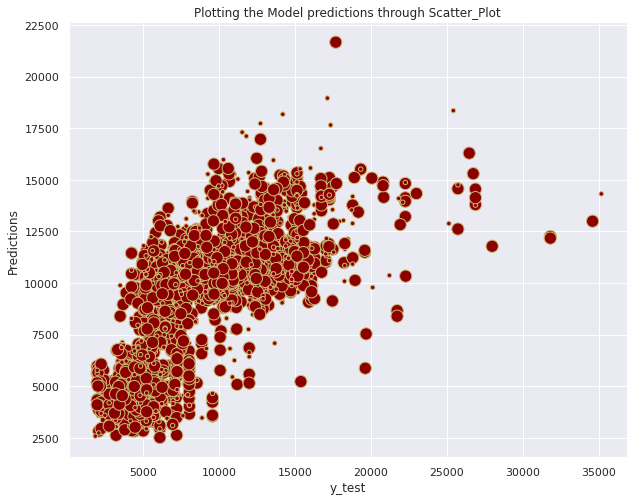

-----------------------------X----------------------------



ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


r2_Score is : 0.5141440369727655
Mean_Squared_Error is : 9213239.651633058
Mean_Absolute_Error is : 2295.4038199152906
Root_Mean_Squared_Error is: 3035.331884923469


[0.4945575  0.47554818 0.5199514  0.50997152 0.47656884 0.47024729
 0.47393985 0.48708815]
cross validation score:   0.48848409040371865
Difference between R2 score and cross validatio score is : 0.0256599465690468




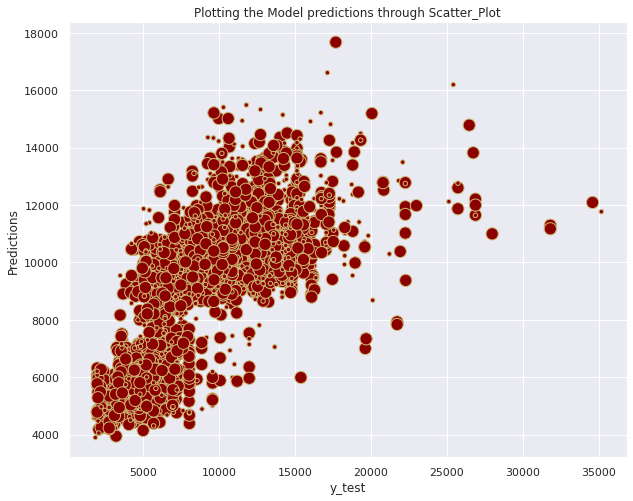

-----------------------------X----------------------------





In [ ]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
GBR =  GradientBoostingRegressor()
KNN = KNeighborsRegressor()
AD = AdaBoostRegressor()
RD = Ridge()
SV = SVR()
LA = Lasso()
EL = ElasticNet()

models = [LR, DT, RF, GBR, KNN, RD, SV, AD, LA, EL]
for m in models:
  print(m)
  print("\n")
  m.fit(X_train,y_train)
  pred = m.predict(X_test)
  print("r2_Score is :",r2_score(y_test,pred))
  print("Mean_Squared_Error is :",mean_squared_error(y_test,pred))
  print("Mean_Absolute_Error is :",mean_absolute_error(y_test,pred))
  print("Root_Mean_Squared_Error is:",np.sqrt(mean_squared_error(y_test,pred)))
  print('\n')
  score=cross_val_score(m,X,y,cv=8)
  print(score)
  print("cross validation score:  ",score.mean())
  print("Difference between R2 score and cross validatio score is :",r2_score(y_test,pred)-abs(score.mean()))
  print('\n')
  plt.figure(figsize=(10,8))
  plt.title('Plotting the Model predictions through Scatter_Plot')
  plt.scatter(x=y_test,y=pred,sizes=(20, 150),edgecolors='y',c='darkred',marker ="o")
  plt.xlabel('y_test')
  plt.ylabel('Predictions')
  plt.show()
  print("-----------------------------X----------------------------")
  print("\n\n")

**Observation :**

1. We see Regression model - RandomForestRegressor has the highest r2_score of 0.85 while SVR has the lowest r2_score of 0.04 .
2. But in RandomForestRegressor we see that difference between r2_score and cross validation score is least among all i.e, 0.002 . Hence RandomForestRegressor is our best fitted Model .

# **Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
RF.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [ ]:
parameters = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [ ]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [ ]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
GCV.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 150}

In [ ]:
Final_Model = RandomForestRegressor(max_depth = 15 , max_features='sqrt',n_estimators=150)
Final_Model.fit(X_train, y_train)
pred_model = Final_Model.predict(X_test)
r2score=r2_score(y_test,pred_model)
print('Final score is :')
print('________________')
print('\nR2_score of best fitted model is :',r2score*100)
print ('Mean_Squared_error is:',mean_squared_error(y_test, pred_model))
print ('Mean_Absolute_error is :',mean_absolute_error(y_test, pred_model))
print('Root_Mean_squared_Error is :',np.sqrt(mean_squared_error(y_test,pred_model)))

Final score is :
________________

R2_score of best fitted model is : 85.78300637114349
Mean_Squared_error is: 2695954.7560611707
Mean_Absolute_error is : 1042.202763451356
Root_Mean_squared_Error is : 1641.9362825826008


**Our model learnt almost 86% of accuracy**

In [ ]:
#Checking Cross_Validation
cvs = cross_val_score(Final_Model,X,y,cv=5)
print("Cross validation score of ",Final_Model,'is :',cvs.mean())

Cross validation score of  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) is : 0.8377053624310715


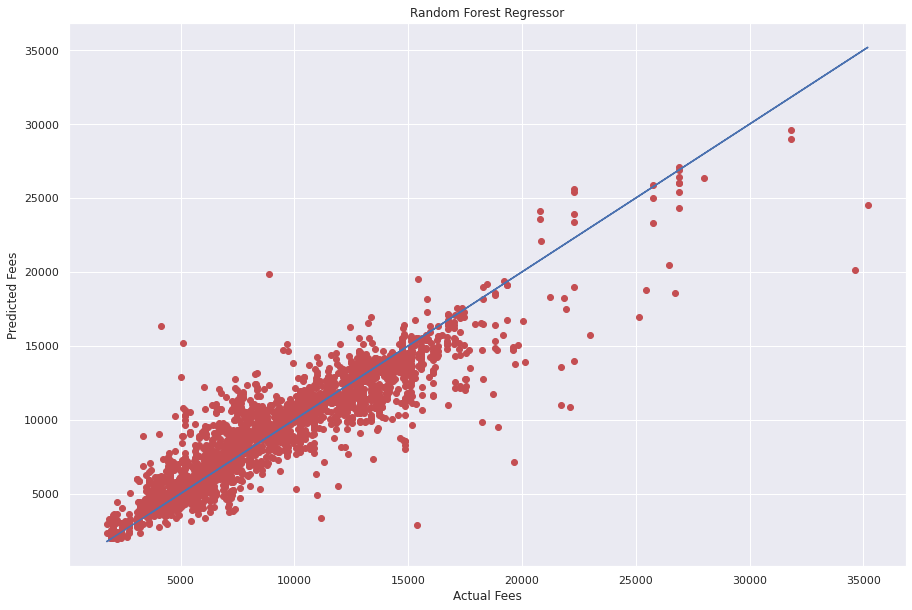

In [ ]:
# plotting the Model

plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=pred_model,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Fees')
plt.ylabel('Predicted Fees')
plt.title('Random Forest Regressor')
plt.show()

**Using the test set to predict the target variable and finally use this prediction variable for submission.**

In [ ]:
Flight_test.head()

Airline  Source  Destination  Total_Stops  Additional_Info  Date  \
10683        4       2            1            1                8     6   
10684        3       3            0            1                8    12   
10685        4       2            1            1                5    21   
10686        6       2            1            1                8    21   
10687        0       0            2            0                8    24   

       Month  Year  Route1  Route2  Route3  Route4  Dep_Time_hour  \
10683      6     6       3       7       6      13             17   
10684     12    12       2      33       3      13              6   
10685     21    21       3       7       6      13             19   
10686     21    21       3       7       6      13              8   
10687     24    24       0      13      30      13             23   

       Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  dur_hour  \
10683               30                  4                   25        10   
10684               20                 10                   20         4   
10685               15                 19                    0        23   
10686                0                 21                    0        13   
10687               55                  2                   45         2   

       dur_min  
10683       55  
10684        0  
10685       45  
10686        0  
10687       50

In [ ]:
#Final_Model is the object for RandomForestRegressor

print("The Prediction of Test Data from best Trained Model is :")
print('\n')
Test_prediction=Final_Model.predict(Flight_test)    #using test dataset to predict results
Test_prediction

The Prediction of Test Data from best Trained Model is :




array([7087.22466667, 6872.6155873 , 7089.02355556, ..., 7087.22466667,
       7176.40615873, 7087.22466667])

In [ ]:
#Creating a DataFrame of the Predicted Values

Test_prediction=pd.DataFrame(Test_prediction, columns=['Fees'])
Test_prediction.head(20)

Fees
0   7087.224667
1   6872.615587
2   7089.023556
3   6864.333556
4   8179.074205
5   7087.224667
6   7226.545556
7   7249.141111
8   6954.715111
9   6982.201778
10  7890.258000
11  7087.224667
12  7120.544825
13  7174.308889
14  7087.224667
15  7174.308889
16  7087.224667
17  6982.201778
18  7087.224667
19  7174.308889

**Saving Predicted Values into a CSV File**

In [ ]:
Test_prediction.to_csv('Test_pred.csv')

# **Saving the Model**

In [ ]:
import pickle

filename='Flight Price Prediction.pkl'
pickle.dump(Final_Model,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(Flight_test)

array([7087.22466667, 6872.6155873 , 7089.02355556, ..., 7087.22466667,
       7176.40615873, 7087.22466667])